# READ MASS BALANCE DATA FROM OGGM, PYGEM, GLOGEM

In [1]:
# Import libraries
import numpy as np
import xarray as xr
import pandas as pd

## GLOGEM

### Glacier-wide monthly mass balance

In [2]:
filepath_glo_gw = 'C:/Users/kasj/OneDrive - Høgskulen på Vestlandet/Data/ML_model_comparison/GloGEM_glacier_wide/RGI08_glacier-wide/RGI08_glacier-wide/'
filename_glo_gw = 'scandinavia_Balance_mon_r1.dat'

In [35]:
# File structure:
# For each row: 1ID + 12 (monthly) values * num_years. The first year starts with month 10, last year ends with month 9, the first column is glacier ID
# File only contains 1 + 41 column names, representing the identifier and the years.
# Need to create new column names corresponding to year and month

id_col = ['ID']
years = range(1981, 2020)  # 1981 - 2019
initial_months_1980 = ['1980_10', '1980_11', '1980_12']
subsequent_months = [f"{year}_{month:02d}" for year in years for month in range(1, 13)]
final_months_2020 = [f"2020_{month:02d}" for month in range(1, 10)]

# Combine all column names
column_names = id_col + initial_months_1980 + subsequent_months + final_months_2020

# Load data, skip first row with old column names
df = pd.read_csv(filepath_glo_gw + filename_glo_gw, delim_whitespace=True,
                 header=None, names=column_names, index_col=False, skiprows=1)


In [34]:
df

,ID,1980_10,1980_11,1980_12,1981_01,1981_02,1981_03,1981_04,1981_05,1981_06,...,2019_12,2020_01,2020_02,2020_03,2020_04,2020_05,2020_06,2020_07,2020_08,2020_09
0,3287,0.0000,0.9559,0.6842,0.3142,0.4000,0.2478,0.3683,-0.2213,-0.8148,...,0.6255,0.4889,0.4616,0.7420,-0.2953,-0.3252,-0.7112,-1.0052,-1.4863,-0.9279
1,2665,-0.2588,1.0097,0.7774,0.3603,0.4295,0.2852,0.4059,-0.3080,-0.7726,...,0.7544,0.6131,0.5424,0.8516,-0.3489,-0.3597,-0.7041,-0.9472,-0.9151,-0.9400
2,2669,0.1749,0.7382,0.5573,0.2583,0.3079,0.2045,0.3291,-0.1345,-0.7181,...,0.5588,0.4403,0.4092,0.6155,-0.2181,-0.2066,-0.6371,-0.9221,-0.8808,-0.6952
3,2660,0.1832,0.6302,0.4758,0.2205,0.2629,0.1746,0.2918,-0.0443,-0.6410,...,0.4771,0.3759,0.3494,0.5255,-0.1312,-0.0292,-0.5600,-0.8439,-0.8014,-0.5560
4,336,0.1757,0.8262,0.6238,0.2891,0.3447,0.2288,0.3628,-0.1871,-0.7551,...,0.6246,0.4928,0.4577,0.6889,-0.2593,-0.2797,-0.6741,-0.9596,-1.0686,-0.7885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,2483,0.3128,0.2432,0.3458,0.2675,0.2700,0.1210,0.2393,0.2549,-0.5556,...,0.2513,0.3336,0.3103,0.3644,0.3105,0.2788,-0.3255,-0.6637,-0.6048,-0.3250
3412,2476,0.3199,0.2463,0.3503,0.2709,0.2735,0.1226,0.2433,0.2730,-0.5515,...,0.2546,0.3379,0.3143,0.3691,0.3172,0.3122,-0.3149,-0.6636,-0.6012,-0.3111
3413,3,0.1046,0.1081,0.0910,0.0763,0.0392,0.0660,0.0623,-0.0073,-0.8712,...,0.0607,0.0645,0.1153,0.1060,-0.0012,-0.1885,-0.6308,-1.5916,-1.4324,-0.8067
3414,4,0.1030,0.1074,0.0904,0.0758,0.0390,0.0655,0.0613,-0.0133,-0.8855,...,0.0604,0.0641,0.1146,0.1053,-0.0038,-0.2067,-0.6447,-1.6207,-1.4613,-0.8339


### Elevation-band monthly mass balance

In [37]:
filepath_glo_elevband = 'C:/Users/kasj/OneDrive - Høgskulen på Vestlandet/Data/ML_model_comparison/GloGEM_monthly_elevation_bands/mb_elevation_monthly/'
filename_glo_elevband_prefix = 'belev_mon_0'
filename_glo_elevband_suffix = '.dat'


In [38]:
# Folder contains one file per glacier id. Get glacier ids with point mb observations and retrieve only these data.
# Specify filepaths and filenames.          
loc = 'local'

if loc == 'cryocloud':
    filepath = '/home/jovyan/ML_MB_Norway_data/'
elif loc == 'local':
    filepath = 'Data/'

filename = '2023-08-28_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Load data.
data = pd.read_csv(filepath + filename)


C:\Users\kasj\AppData\Local\Temp\ipykernel_2596\1641773205.py:13: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath + filename)


In [39]:
data

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate
0,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1012,...,0.005081,0.005116,0.002688,0.002334,0.001159,0.003054,0.003977,0.004691,0.001449,341.227919
1,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1013,...,0.000121,0.001831,0.004597,0.005634,0.002244,0.003412,0.000891,0.002129,0.004860,341.227919
2,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1013,...,0.001190,0.004949,0.003286,0.003739,0.004709,0.005111,0.001253,0.002506,0.003256,341.227919
3,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1013,...,0.001945,0.002495,0.002263,0.001256,0.002129,0.003969,0.003559,0.002119,0.002851,341.227919
4,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1016,...,0.004863,0.003314,0.004417,0.002704,0.003991,0.001780,0.004257,0.005193,0.000710,341.227919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1509,...,0.009134,0.011964,0.007288,0.003555,0.005019,0.004730,0.007226,0.005739,0.011397,917.419759
4167,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1509,...,0.005585,0.002572,0.000807,0.009360,0.006135,0.006760,0.005158,0.008218,0.005461,917.419759
4168,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1514,...,0.017394,0.008543,0.010311,0.006261,0.008175,0.005974,0.006563,0.008015,0.003896,917.419759
4169,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1514,...,0.007431,0.008916,0.003751,0.004573,0.004449,0.005235,0.008926,0.011151,0.009556,917.419759


In [45]:
# Get list of RGIID from 'RGIID' column using only last four digits of the ID
rgi_ids = data['RGIID'].str[-4:].unique()
rgi_ids_list = rgi_ids.tolist()
print(rgi_ids_list)

['1258', '2436', '2458', '1026', '2384', '0287', '1657', '1598', '0295', '1484', '2666', '2650', '2017', '1126', '0434', '1186', '1286', '1217', '0868', '0987', '0449', '1013', '0966', '1779', '2966', '2963', '2962', '2643', '2916', '2918', '2920', '2969']


In [59]:
# Dict to store DataFrames
dfs = {}

# Loop through list of rgiids and read files
for identifier in rgi_ids_list:

    filename = f'belev_mon_0{identifier}.dat'
    
    # Read data as DataFrame
    df = pd.read_csv(filepath_glo_elevband + filename, delim_whitespace=True, skiprows=2, header=0)
    
    # Replace -99.000 with NaN
    df.replace(-99.000, np.nan, inplace=True)
    
    # Add DataFrame to dict
    dfs[identifier] = df

data_arrays = []

# Iterate over DataFrames and create dataarray for each
for identifier, df in dfs.items():
    # Use Year+Month as time coordinates and the elevation as 'elevation' dimension
    da = xr.DataArray(df.values[:,3:], coords={'time': pd.to_datetime(df[['Year', 'Month']].assign(day=1)),
                                         'elevation': df.columns[3:].astype(int),
                                         'ID': identifier},
                      dims=['time', 'elevation'])
    data_arrays.append(da)

# Combine DataArrays to Dataset
ds = xr.concat(data_arrays, dim='ID')

# Set the elevations as non-dimensional coordinate and will with NaNs for glaciers where these elev bands don't exist
ds = ds.reindex(elevation=list(np.unique(np.concatenate([da.elevation.values for da in data_arrays]))), fill_value=np.nan)

print(ds)

<xarray.DataArray (ID: 32, time: 480, elevation: 225)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,

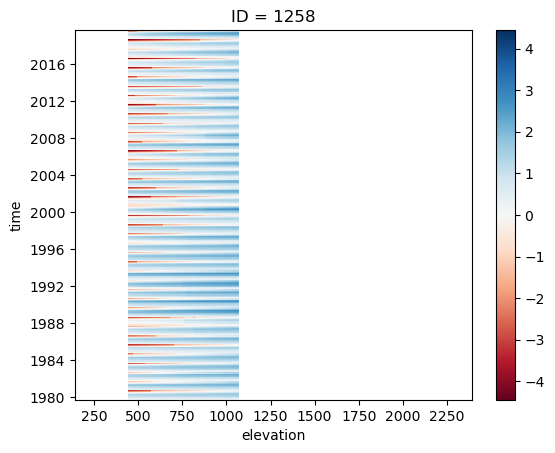

In [68]:
ds[0,:,:].plot(cmap='RdBu')

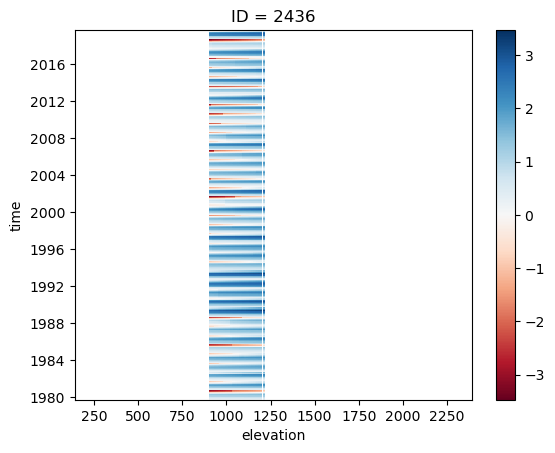

In [67]:
ds[1,:,:].plot(cmap='RdBu')


In [86]:
# Values are cumulative from Oct of each year until september of the following year (cumulative over the hydrological year)
# to get the monthly elevation band value we need to subtract the previous months value (except for october, when a new period starts).

# Make a copy of the dataset
ds_monthly_values = ds.copy()

# Calculate the diff along the time dimension to get the monthly values
# pad the front to maintain the array shape after diff
monthly_diff = ds.diff(dim='time').pad(time=(1, 0), constant_values=0)

# Determine which entries in the 'time' dimension correspond to October.
# October data will be the sum up to that point, not a difference as with other months.
is_october = ds['time'].dt.month == 10

# Preserve October cumulative values
# Use isel to explicitly preserve the October data for every year except the first year (1979),
# since diff has created a valid value at the first index.
for i in range(1, len(ds['time'])):
    if is_october.isel(time=i):
        monthly_diff[i] = ds.isel(time=i)

# Assign the corrected values to the monthly values DataArray
ds_monthly_values[:, 1:, :] = monthly_diff[:, 1:, :]

# Now ds_monthly_values should have the correct monthly values while preserving the original 
# cumulative October values. The first timestep of the entire dataset (October 1979) remains unchanged.



IndexError: dimension coordinate 'ID' conflicts between indexed and indexing objects:
<xarray.DataArray 'ID' (ID: 32)>
array(['1258', '2436', '2458', '1026', '2384', '0287', '1657', '1598', '0295',
       '1484', '2666', '2650', '2017', '1126', '0434', '1186', '1286', '1217',
       '0868', '0987', '0449', '1013', '0966', '1779', '2966', '2963', '2962',
       '2643', '2916', '2918', '2920', '2969'], dtype='<U4')
Coordinates:
    time     datetime64[ns] 1980-10-01
  * ID       (ID) <U4 '1258' '2436' '2458' '1026' ... '2918' '2920' '2969'
vs.
<xarray.Variable ()>
array('2017', dtype='<U4')

In [ ]:
ds_annual_mb_elevband = ds.coarsen(time=12, boundary='trim').sum()
hydro_years = pd.date_range(start='1980', end='2020', freq='AS-OCT')

# Assign the new time coordinates to the time dimension of the annual_sums DataArray
ds_annual_mb_elevband = ds_annual_mb_elevband.assign_coords(time=hydro_years)

In [79]:
annual_sums

<xarray.DataArray (ID: 32, time: 40, elevation: 225)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time       (time) datetime64[ns] 1980-03-16T20:00:00 ... 2019-03-17T06:00:00
  * elevation  (elevation) int64 145 155 165 175 185 ... 2355 2365 2375 2385
  * ID         (ID) <U4 '1258' '2436' '2458' '1026' ... '2918' '2920' '2969'

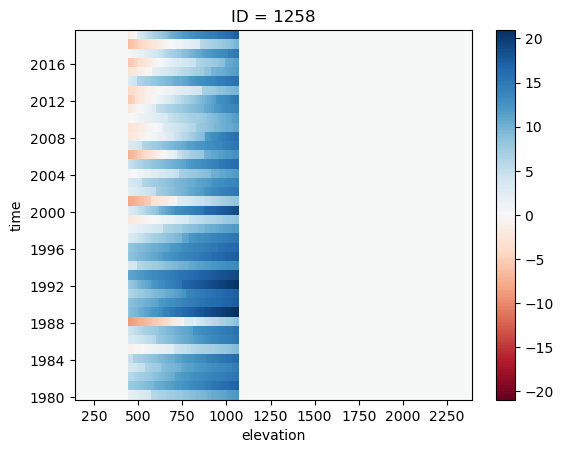

In [80]:
annual_sums[0,:,:].plot(cmap='RdBu')

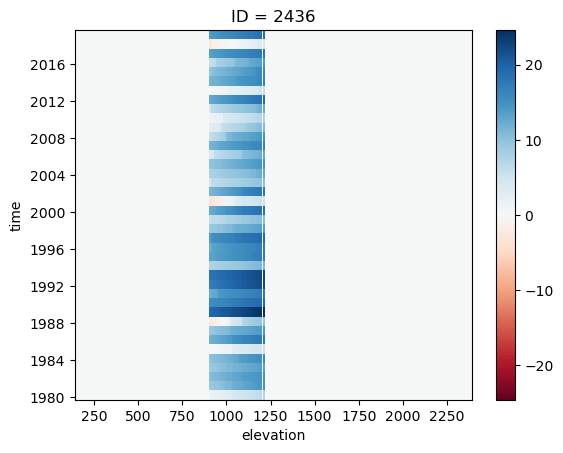

In [81]:
annual_sums[1,:,:].plot(cmap='RdBu')